In [2]:
!pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
purchase_behaviour = pd.read_csv("purchase_behaviour.xls") 

In [10]:
# Check for missing values
print("Missing values in transaction_data:\n", transaction_data.isnull().sum())
print("\nMissing values in purchase_behaviour:\n", purchase_behaviour.isnull().sum())

Missing values in transaction_data:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in purchase_behaviour:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [11]:
# Drop rows with missing values (if necessary)
transaction_data.dropna(inplace=True)
purchase_behaviour.dropna(inplace=True)


In [12]:
# Top 3 most profitable products
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

In [13]:
# Identify most loyal customer segment
customer_loyalty = (
    transaction_data.groupby("LYLTY_CARD_NBR")["TOT_SALES"]
    .sum()
    .reset_index()
    .merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="inner")
)

In [14]:
# Aggregate loyalty by customer segment
loyalty_by_segment = (
    customer_loyalty.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

In [15]:
# Print results
print("Top 3 Most Profitable Products:\n", top_products)
print("\nTop 3 Most Loyal Customer Segments:\n", loyalty_by_segment.head(3))

Top 3 Most Profitable Products:
     PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Top 3 Most Loyal Customer Segments:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05


In [16]:
# Save results
top_products.to_csv("top_products.csv", index=False)
loyalty_by_segment.to_csv("loyalty_by_segment.csv", index=False)

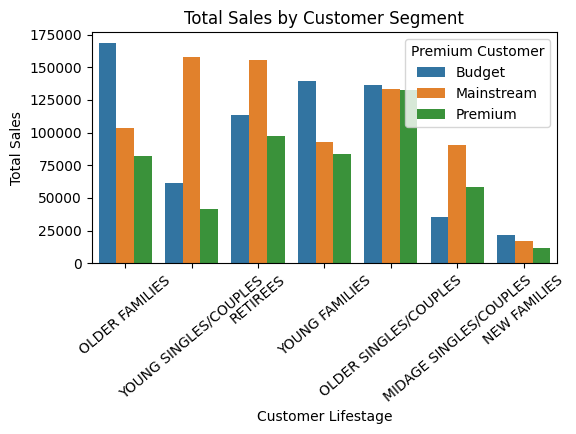

In [22]:
# Visualization: Sales by Customer Segment
plt.figure(figsize=(6, 3))
sns.barplot(
    data=loyalty_by_segment,
    x="LIFESTAGE",
    y="TOT_SALES",
    hue="PREMIUM_CUSTOMER"
)
plt.xticks(rotation=40)
plt.title("Total Sales by Customer Segment")
plt.xlabel("Customer Lifestage")
plt.ylabel("Total Sales")
plt.legend(title="Premium Customer")
plt.show()